Data Extraction with yahoo Finance Stock Page

In [74]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL of the page
base_url = "https://finance.yahoo.com/most-active"
count = 200  # Total number of items you want to scrape
offset = 0  # Initial offset

# Initialize empty lists for each column
symbols = []
names = []
prices = []
changes = []
percent_changes = []

while len(symbols) < count:
    # Construct the URL with the current offset
    url = f"{base_url}?count=100&offset={offset}"

    # Send an HTTP GET request to the URL
    response = requests.get(url)

    # Parse the HTML content of the page with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing the data
    table = soup.find('table')

    # Loop through the rows in the table
    for row in table.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all('td')
        data = [col.get_text(strip=True) for col in columns]
        if len(data) >= 4:
            symbols.append(data[0])
            names.append(data[1])
            prices.append(data[2])
            changes.append(data[3])
            percent_changes.append(data[4])

    offset += 100  # Increment the offset for the next page

# Create a DataFrame from the lists
df = pd.DataFrame({
    'Symbol': symbols,
    'Name': names,
    'Price': prices,
    'Change': changes,
    '% Change': percent_changes
})

# Print the first 200 rows of the DataFrame
print(df.head(200))






    Symbol                          Name   Price Change % Change
0     TSLA                   Tesla, Inc.  263.62  +3.95   +1.52%
1     PLTR    Palantir Technologies Inc.   17.80  +0.19   +1.08%
2      AMD  Advanced Micro Devices, Inc.  109.01  +2.04   +1.91%
3     RIVN       Rivian Automotive, Inc.   19.64  +0.86   +4.58%
4      BAC   Bank of America Corporation   27.01  +0.70   +2.66%
..     ...                           ...     ...    ...      ...
195      U           Unity Software Inc.   30.02  +0.32   +1.08%
196   ITUB    Itaú Unibanco Holding S.A.    5.41  +0.07   +1.31%
197   MSFT         Microsoft Corporation  328.39  -1.43   -0.43%
198   SNAP                     Snap Inc.    8.82  +0.21   +2.44%
199    RUN                   Sunrun Inc.   11.93  +1.43  +13.62%

[200 rows x 5 columns]


In [75]:
# Remove the percent symbol and convert the "% Change" values to numeric
df["% Change"] = df["% Change"].str.replace('%', '').astype(float) / 100

df



,Symbol,Name,Price,Change,% Change
0,TSLA,"Tesla, Inc.",263.62,+3.95,0.0152
1,PLTR,Palantir Technologies Inc.,17.80,+0.19,0.0108
2,AMD,"Advanced Micro Devices, Inc.",109.01,+2.04,0.0191
3,RIVN,"Rivian Automotive, Inc.",19.64,+0.86,0.0458
4,BAC,Bank of America Corporation,27.01,+0.70,0.0266
...,...,...,...,...,...
195,U,Unity Software Inc.,30.02,+0.32,0.0108
196,ITUB,Itaú Unibanco Holding S.A.,5.41,+0.07,0.0131
197,MSFT,Microsoft Corporation,328.39,-1.43,-0.0043
198,SNAP,Snap Inc.,8.82,+0.21,0.0244


In [76]:
df.to_csv("YahooFinance.csv")

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Symbol    200 non-null    object 
 1   Name      200 non-null    object 
 2   Price     200 non-null    object 
 3   Change    200 non-null    object 
 4   % Change  200 non-null    float64
dtypes: float64(1), object(4)
memory usage: 7.9+ KB


Visualizations and Analysis

In [78]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
print ("Imported all libraries successfully...")

Imported all libraries successfully...


In [79]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df = pd.read_csv("YahooFinance.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   Symbol      200 non-null    object 
 2   Name        200 non-null    object 
 3   Price       200 non-null    float64
 4   Change      200 non-null    float64
 5   % Change    200 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB


Highest Percentage Change Graph

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 50 artists>

Text(0.5, 0, '% Change')

Text(0, 0.5, 'Stock Name')

Text(0.5, 1.0, 'Top 50 Stocks with Highest Percentage Change')

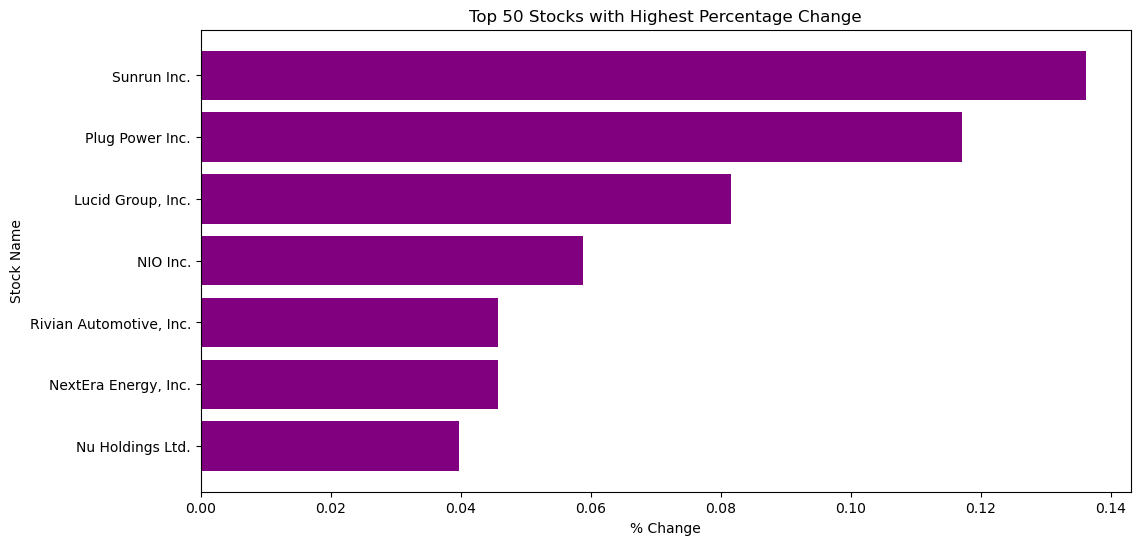

In [89]:
df = df.sort_values(by='% Change', ascending = False)
positive_changes = df[df['% Change'] > 0]

n = 50
top_stocks = positive_changes.head(n)

plt.figure(figsize=(12,6))
plt.barh(top_stocks['Name'], top_stocks['% Change'], color='purple')
plt.xlabel('% Change')
plt.ylabel('Stock Name')
plt.title(f'Top {n} Stocks with Highest Percentage Change')
plt.gca().invert_yaxis()
plt.show()

Insight: Based on this graph, these are the corporations with the highest percentage change. This chart can be used for tracking the performance over time. This chart can also be used to research why these specific companies performed well.

Scatterplot of Price vs Change

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Change')

Text(0.5, 1.0, 'Scatter Plot of Price vs. Change')

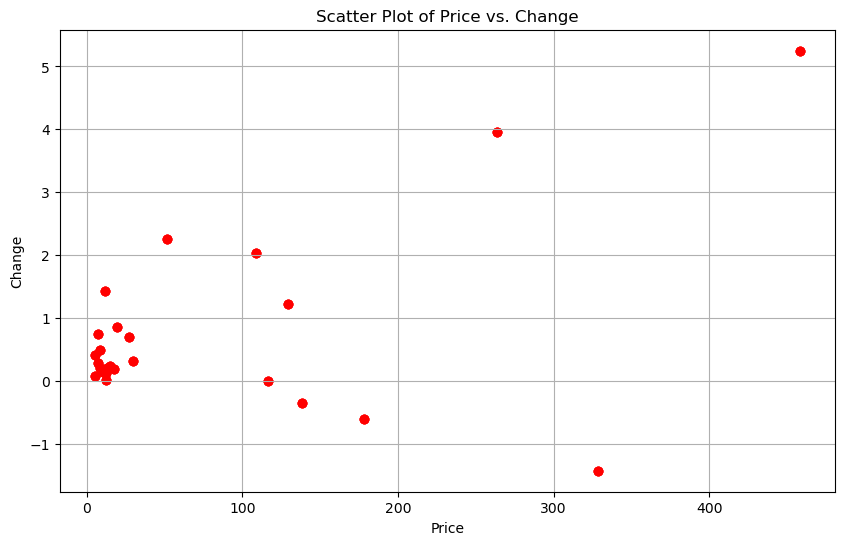

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Change'], c='red', alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Change')
plt.title('Scatter Plot of Price vs. Change')
plt.grid(True)
plt.show()


Insights: Based on this plot, you can observe that most of the points are clustered in the lower price range. This suggests that majority of the stocks are relatively low prices. There are a few outliers. These represent higher prices and significant price changes. 

Histogram of Percentage Change

<Figure size 1400x600 with 0 Axes>

(array([40.,  8., 72.,  8., 16.,  0.,  8., 16.,  8.,  0.,  0.,  0.,  8.,
         0.,  0.,  0.,  0.,  8.,  0.,  8.]),
 array([-0.0043  ,  0.002725,  0.00975 ,  0.016775,  0.0238  ,  0.030825,
         0.03785 ,  0.044875,  0.0519  ,  0.058925,  0.06595 ,  0.072975,
         0.08    ,  0.087025,  0.09405 ,  0.101075,  0.1081  ,  0.115125,
         0.12215 ,  0.129175,  0.1362  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, '% Change')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Percentage Change')

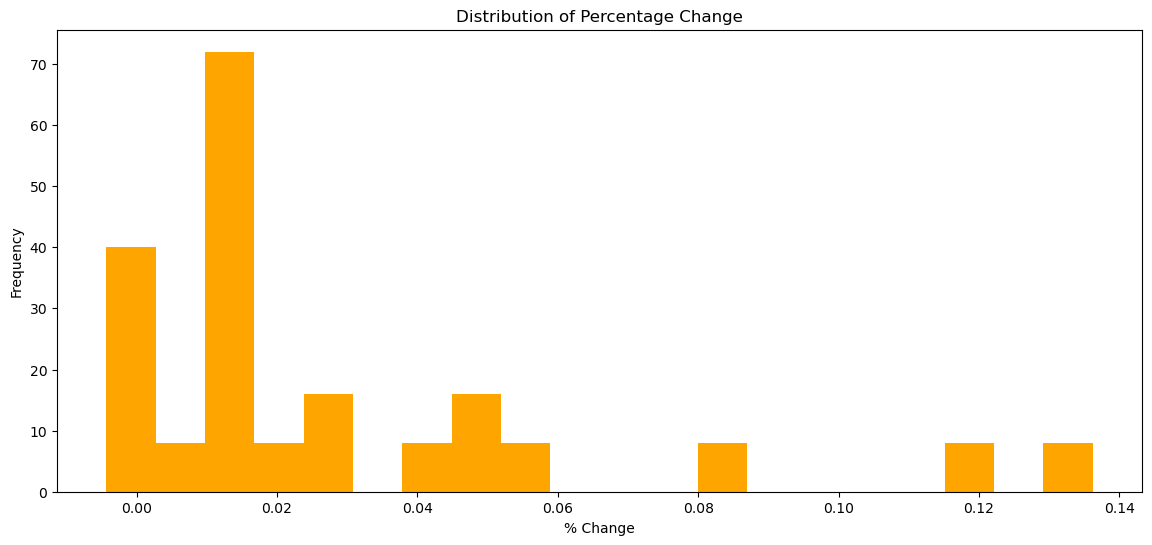

In [83]:
plt.figure(figsize=(14, 6))
plt.hist(df['% Change'], bins=20, color='orange')
plt.xlabel('% Change')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage Change')
plt.show()


Insights: The shape of this graph seems to be right skewed, meaning that there are more stocks with lower %changes than higher % changes. The most popular % change is between 0.00 and 0.02. 

Bar Chart of Prices for Top Stocks

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 50 artists>

Text(0.5, 0, 'Stock Name')

Text(0, 0.5, 'Price')

Text(0.5, 1.0, 'Top 50 Stocks by Price')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'NVIDIA Corporation'),
  Text(1, 0, 'Microsoft Corporation'),
  Text(2, 0, 'Tesla, Inc.'),
  Text(3, 0, 'Apple Inc.'),
  Text(4, 0, 'Alphabet Inc.'),
  Text(5, 0, 'Amazon.com, Inc.'),
  Text(6, 0, 'Horizon Therapeutics Public Limited Company')])

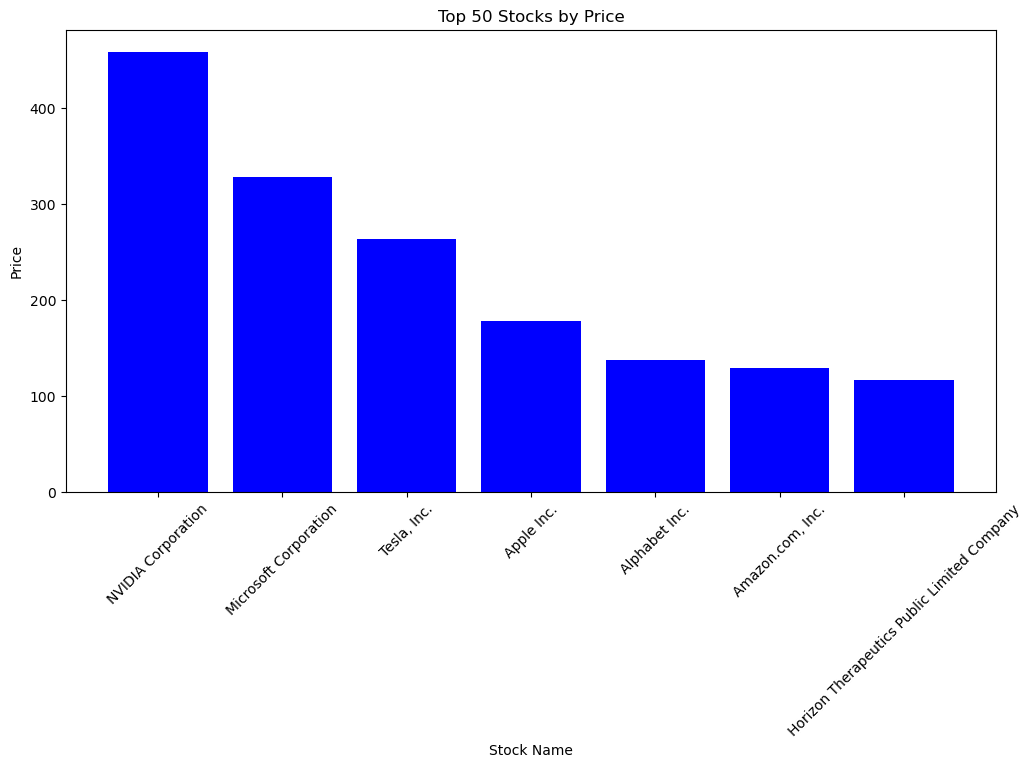

In [87]:
import matplotlib.pyplot as plt

n = 50  # Number of top stocks to display
top_stocks = df.nlargest(n, 'Price')

plt.figure(figsize=(12, 6))
plt.bar(top_stocks['Name'], top_stocks['Price'], color='blue')
plt.xlabel('Stock Name')
plt.ylabel('Price')
plt.title(f'Top {n} Stocks by Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


Insights: These are the top stocks that are relatively expensive based on their share prices. You can observe that the top stocks come from various industries and sectors. You can also see that the price varies too which suggests that some sectors are more expensive and it indicates a wide range of investment options. You can also see which stocks would be more ideal for long term investors since higher priced stocks are more appealing. 